# The Probability Density Function (PDF) - Lab

## Introduction

In this lab we will look at building visualizations known as **density plots** to estimate the probability density for a given set of data. 

## Objectives

You will be able to: 

* Calculate the PDF from given dataset containing real valued random variables
* Plot density functions and comment on the shape of the plot
* Plot density functions using seaborn


## Let's get started!

We'll import all the required libraries for you for this lab.

In [3]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd 

#### Import the dataset 'weight-height.csv' as pandas dataframe . Calculate the mean and standard deviation for weights and heights for male and female individually. 

Hint : Use your pandas dataframe subsetting skills like loc(), iloc() and groupby()

In [4]:
data = pd.read_csv('weight-height.csv')
data.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [5]:
male_df = data.loc[(data.Gender == 'Male')]
male_df.head()
print(male_df.groupby(male_df.Gender)['Height'].mean())
print(male_df.groupby(male_df.Gender)['Height'].std())
print(male_df.groupby(male_df.Gender)['Weight'].mean())
print(male_df.groupby(male_df.Gender)['Weight'].std())


Gender
Male    69.026346
Name: Height, dtype: float64
Gender
Male    2.863362
Name: Height, dtype: float64
Gender
Male    187.020621
Name: Weight, dtype: float64
Gender
Male    19.781155
Name: Weight, dtype: float64


In [6]:
female_df = data.loc[(data.Gender == 'Female')]
female_df.head()
print(female_df.groupby(female_df.Gender)['Height'].mean())
print(female_df.groupby(female_df.Gender)['Height'].std())
print(female_df.groupby(female_df.Gender)['Weight'].mean())
print(female_df.groupby(female_df.Gender)['Weight'].std())

Gender
Female    63.708774
Name: Height, dtype: float64
Gender
Female    2.696284
Name: Height, dtype: float64
Gender
Female    135.860093
Name: Weight, dtype: float64
Gender
Female    19.022468
Name: Weight, dtype: float64


In [7]:
# Male Height mean: 69.02634590621737
# Male Height sd: 2.8633622286606517
# Male Weight mean: 187.0206206581929
# Male Weight sd: 19.781154516763813
# Female Height mean: 63.708773603424916
# Female Height sd: 2.696284015765056
# Female Weight mean: 135.8600930074687
# Female Weight sd: 19.022467805319007

#### Plot overlapping normalized histograms for male and female heights - use binsize = 10, set alpha level so that overlap can be visualized

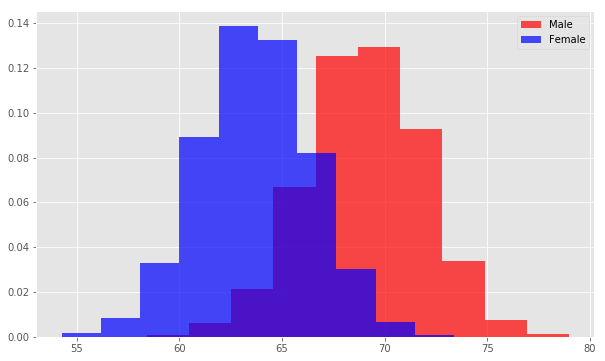

In [8]:
new_figure = plt.figure(figsize = (10,6))

ax = new_figure.add_subplot(111)

ax.hist(male_df.Height, color = 'red', bins = 10, density = True, label = 'Male', alpha = .7)

ax.hist(female_df.Height, color = 'blue', bins = 10, density = True, label = 'Female', alpha = .7)

plt.legend()

plt.show()

In [9]:
# Record your observations - are these inline with your personal observations?
#Female height and standard deviation seem to be right, as do male


#### Write a function density() that takes in a random variable and calculates the density function using `np.hist` and interpolation. The function should return two lists carrying x and y coordinates for plotting the density functio

In [12]:
def density(x):
    n, bins = np.histogram(x, 10, density = 1)
    pdfx = np.ones(n.size)
    pdfx -= pdfx
    pdfy = np.ones(n.size)
    pdfy -= pdfy
    
    for k in range(n.size):
        pdfx[k] = .5 * (bins[k] + bins[k+1])
        pdfy[k] = n[k]
        
    return pdfx, pdfy

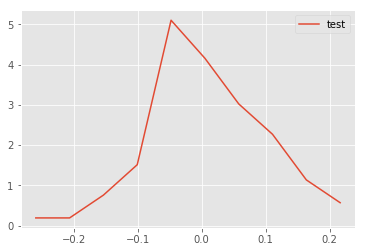

In [13]:
# Generate test data and test the function - uncomment to run the test
np.random.seed(5)
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 100)
x,y = density(s)
plt.plot(x,y, label = 'test')
plt.legend()

#### Add Overlapping density plots for male and female heights to the histograms plotted earlier

In [ ]:
# You code here 

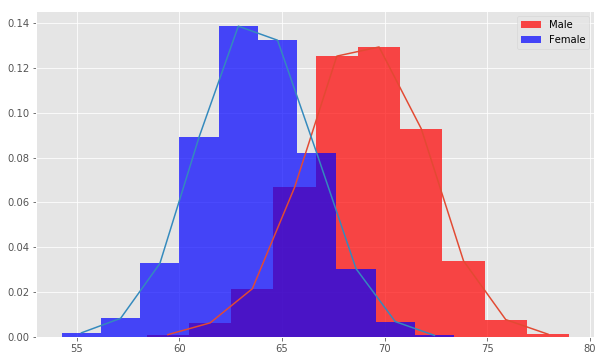

In [14]:
new_figure = plt.figure(figsize = (10,6))

ax = new_figure.add_subplot(111)

ax.hist(male_df.Height, color = 'red', bins = 10, density = True, label = 'Male', alpha = .7)

ax.hist(female_df.Height, color = 'blue', bins = 10, density = True, label = 'Female', alpha = .7)

plt.legend()

x,y = density(male_df.Height)
plt.plot(x,y)
x,y = density(female_df.Height)
plt.plot(x,y)



plt.show()

#### Repeat above exerice for male and female weights

In [ ]:
# Your code here 

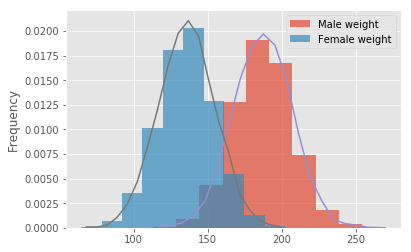

#### Write your observations in the cell below.

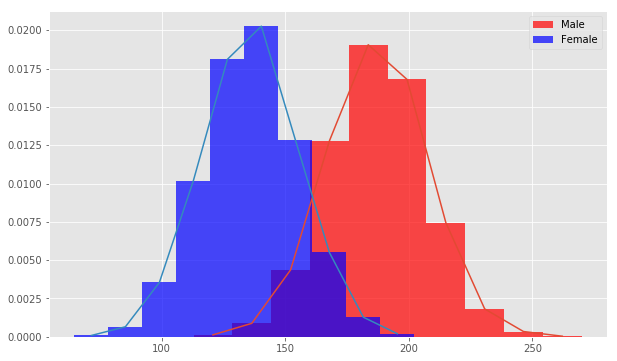

In [17]:
# Record your observations - are these inline with your personal observations?

new_figure = plt.figure(figsize = (10,6))

ax = new_figure.add_subplot(111)

ax.hist(male_df.Weight, color = 'red', bins = 10, density = True, label = 'Male', alpha = .7)

ax.hist(female_df.Weight, color = 'blue', bins = 10, density = True, label = 'Female', alpha = .7)

plt.legend()

x,y = density(male_df.Weight)
plt.plot(x,y)
x,y = density(female_df.Weight)
plt.plot(x,y)



plt.show()

# So whats the takeaway when comparing male and female heights and weights 
#Bigger difference between weights


#### Repeat Above experiments in seaborn and compare with your results. 

/Users/dgoldstein24/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/dgoldstein24/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Comparing Heights')

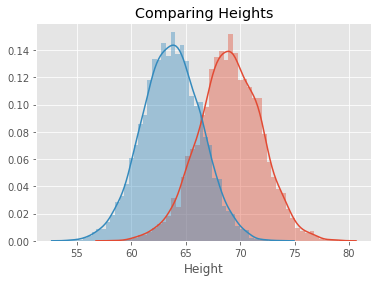

In [18]:
import seaborn as sns
sns.distplot(male_df.Height)
sns.distplot(female_df.Height)
plt.title('Comparing Heights')

/Users/dgoldstein24/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/dgoldstein24/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Comparing Heights')

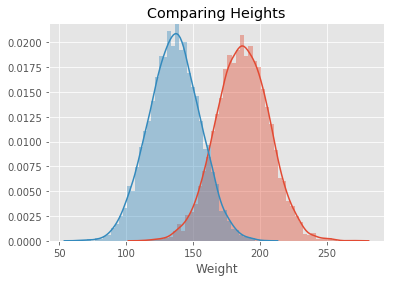

In [19]:
sns.distplot(male_df.Weight)
sns.distplot(female_df.Weight)
plt.title('Comparing Heights')

In [20]:
# Your comments on the two approaches here. 
# are they similar ? what makes them different if they are ?

#Seaborn is much simpler, density functino helps to understand the process, namely finding the midpoints between bins

## Summary

In this lesson we saw how to build the probability density curves visually for given datasets and compare on the distribution visually by looking at the spread , center and overlap between data elements. This is a useful EDA technique and can be used to answer some initial questions before embarking on a complex analytics journey.